### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [72]:
data = pd.read_csv('data/coupons.csv')
print(len(data))

12684


In [74]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [77]:
nullvalues = data.isnull().sum()
nullvalues

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [80]:
data_car = data[data['car'].notna()]
data_car.shape

(108, 26)

In [82]:
data= data.drop(columns='car')
#data2 = data.dropna(subset=['Bar','CoffeeHouse'])
data.shape

(12684, 25)

In [121]:
data2 = data.dropna(subset=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])
data2.shape
#data2.isnull().sum()

(12079, 25)

4. What proportion of the total observations chose to accept the coupon?



In [123]:
couponAccepted = len(data2[data2['Y'] == 1])*100/len(data2)
couponAccepted

56.93352098683666

5. Use a bar plot to visualize the `coupon` column.

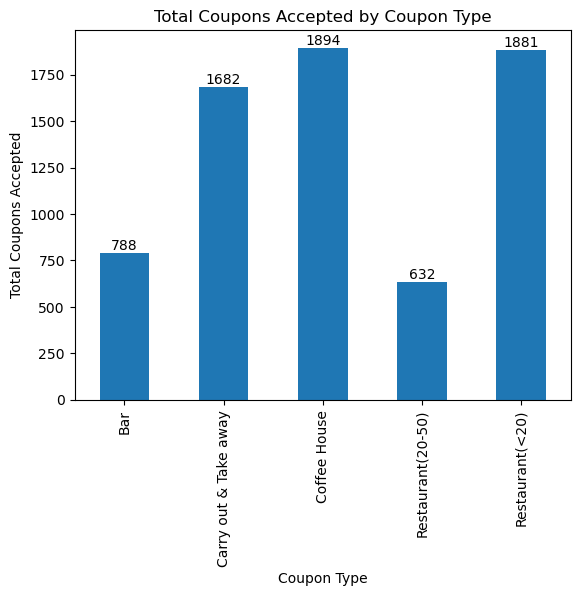

In [142]:
groupByCoupon = data2.groupby('coupon')['Y'].sum()
groupByCoupon.plot(kind='bar')

                   
plt.xlabel('Coupon Type')
plt.ylabel('Total Coupons Accepted')
plt.title('Total Coupons Accepted by Coupon Type')

for index, value in enumerate(groupByCoupon.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

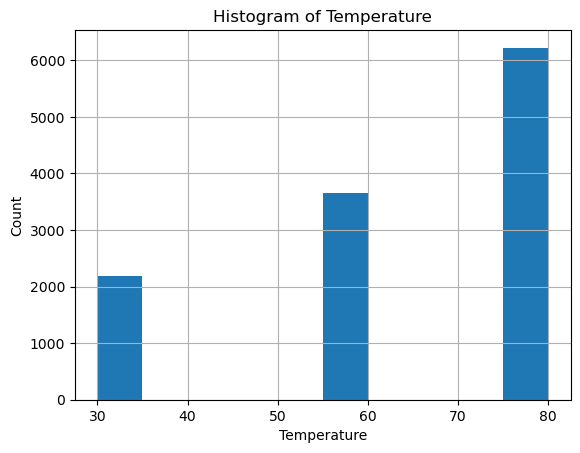

In [224]:
data2['temperature'].hist(),
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature')

Text(0.5, 1.0, 'Histogram of Temperature with values')

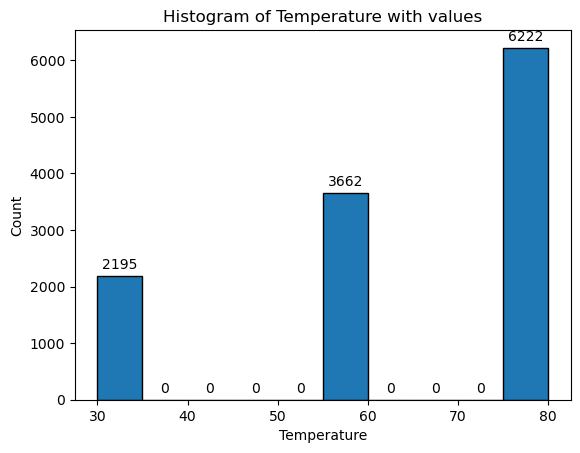

In [222]:
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data2['temperature'], bins=10, edgecolor='black')
for count, x in zip(counts, bins):
    ax.annotate(str(int(count)), xy=(x + (bins[1] - bins[0]) / 2, count), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Histogram of Temperature with values')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [228]:
barcoupons = data2[data2['coupon']=='Bar']
barcoupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [240]:
barcoupons_Y = barcoupons[barcoupons['Y'] == 1] 
print(len(barcoupons_Y)/len(barcoupons))

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [286]:
barcoupons_3orLess = barcoupons[barcoupons['Bar'].isin(['1~3','less1','never'])]
barcoupons_Y_3orLess = barcoupons_Y[barcoupons_Y['Bar'].isin(['1~3','less1','never'])]
barcoupons_moreThan3 = barcoupons[barcoupons['Bar'].isin(['4~8','gt8'])]
barcoupons_Y_moreThan3 = barcoupons_Y[barcoupons_Y['Bar'].isin(['4~8','gt8'])]

In [366]:
'''
print("Total Bar coupons accepted:", len(barcoupons_Y))
print("Total Bar coupons for who went to bar for 3 or fewer times a month::", len(barcoupons_3orLess))
print("Total Bar coupons for who went to bar more than 3 times a month::", len(barcoupons_moreThan3))
print("\n")
print("Total accepted who went to bar for 3 or fewer times a month:", len(barcoupons_Y_3orLess))
print("Total accepted who went to bar for more than 3 times a month:", len(barcoupons_Y_moreThan3))
print("\n")
'''
barcoupons_Y_3orLess_rate = round(len(barcoupons_Y_3orLess)*100/len(barcoupons_3orLess),2)
barcoupons_Y_moreThan3_rate = round(len(barcoupons_Y_moreThan3)*100/len(barcoupons_moreThan3),2)
print("Acceptance rate for who went to a bar 3 or fewer times a month:", barcoupons_Y_3orLess_rate)
print("Acceptance rate for who went to a bar more than times a month:", barcoupons_Y_moreThan3_rate)
print("\n")
compareRateforBar = barcoupons_Y_moreThan3_rate - barcoupons_Y_3orLess_rate
print("Acceptance rate for people who went to the bar more than 3 times a month is ", compareRateforBar, "% higher compare to others who went to bar 3 or fewer times a month.")


Acceptance rate for who went to a bar 3 or fewer times a month: 37.26744186046512
Acceptance rate for who went to a bar more than times a month: 76.16580310880829


Acceptance rate for people who went to the bar more than 3 times a month is  38.89836124834317 % higher compare to others who went to bar 3 or fewer times a month.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [320]:
barcoupons_moreThanOnce_over25 = barcoupons[barcoupons['Bar'].isin(['1~3','4~8','gt8']) & ~barcoupons['age'].isin(['21','below21'])]
barcoupons_moreThanOnce_over25_Y = barcoupons_moreThanOnce_over25[barcoupons_moreThanOnce_over25['Y']==1]

barcoupons_allOthers = barcoupons[~barcoupons['Bar'].isin(['1~3','4~8','gt8']) | barcoupons['age'].isin(['21','below21'])]
barcoupons_allOthers_Y = barcoupons_allOthers[barcoupons_allOthers['Y']==1]


In [374]:
#print("Total drivers who go to a bar more than once a month and are over the age of 25:", len(barcoupons_moreThanOnce_over25))
#print("Total drivers who go to a bar more than once a month, are over the age of 25 and accepted bar coupon:", len(barcoupons_moreThanOnce_over25_Y))
barcoupons_moreThanOnce_over25_Y_rate =  round(len(barcoupons_moreThanOnce_over25_Y)*100/ len(barcoupons_moreThanOnce_over25),2)
print("Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25:", barcoupons_moreThanOnce_over25_Y_rate, "%")
#print("\n")
#print("Total others: ", len(barcoupons_allOthers))
#print("Total others who accepted bar coupon: ", len(barcoupons_allOthers_Y))
barcoupons_allOthers_Y_rate = round(len(barcoupons_allOthers_Y)*100/ len(barcoupons_allOthers),2)
print("Acceptance rate for others: ", barcoupons_allOthers_Y_rate, "%")
print("\n")
print("The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is ", barcoupons_moreThanOnce_over25_Y_rate - barcoupons_allOthers_Y_rate, "% higher than others.")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 68.98 %
Acceptance rate for others:  33.77 %


The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is  35.21 % higher than others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [336]:
#There is no option as 'forestry' under occupation so not using it under filters
barcoupons_compare1 = barcoupons[(barcoupons['Bar'].isin(['1~3','4~8','gt8'])) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['occupation'] != ('Farming Fishing'))]
barcoupons_compare1_Y = barcoupons_compare1[barcoupons_compare1['Y'] == 1]

barcoupons_others = barcoupons[(barcoupons['Bar'].isin(['less1','never'])) | (barcoupons['passanger'] == 'Kid(s)') | (barcoupons['occupation'] == ('Farming Fishing'))]
barcoupons_others_Y = barcoupons_others[barcoupons_others['Y'] == 1]

In [378]:
#print("Total drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: ", len(barcoupons_compare1))
barcoupons_compare1_Y_rate = round(len(barcoupons_compare1_Y)*100/ len(barcoupons_compare1))
print("Acceptance rate for given condition: ", barcoupons_compare1_Y_rate, "%")

#print("Total other drivers: ", len(barcoupons_others))
barcoupons_others_rate = round(len(barcoupons_others_Y)*100/ len(barcoupons_others),2)
print("Acceptance rate for other drivers: ", barcoupons_others_rate, "%")

print("Acceptance rate for the given scenario is ", barcoupons_compare1_Y_rate - barcoupons_others_rate, "% higher than acceptance rate for others.")

Acceptance rate for given condition:  71 %
Acceptance rate for other drivers:  29.79 %
Acceptance rate for the given scenario is  41.21 % higher than acceptance rate for others.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [380]:
#Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
barcoupons_compareA = barcoupons[(barcoupons['Bar'].isin(['1~3','4~8','gt8'])) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['maritalStatus'] != ('Widowed'))]
barcoupons_compareA_Y = barcoupons_compareA[barcoupons_compareA['Y'] == 1]
barcoupons_compareA_rate = round(len(barcoupons_compareA_Y)*100/ len(barcoupons_compareA),2)
print("Acceptance rate for 'Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed' is: ",  barcoupons_compareA_rate, "%")

#Drivers who go to bars more than once a month and are under the age of 30
barcoupons_compareB = barcoupons[(barcoupons['Bar'].isin(['1~3','4~8','gt8'])) & (barcoupons['passanger'] != 'Kid(s)') & (barcoupons['age'].isin(['21','26','lebow21']))]
barcoupons_compareB_Y = barcoupons_compareB[barcoupons_compareB['Y'] == 1]
barcoupons_compareB_rate = round(len(barcoupons_compareB_Y)*100 / len(barcoupons_compareB),2)

print("Acceptance rate for 'Drivers who go to bars more than once a month and are under the age of 30' is: ", barcoupons_compareB_rate, "%")

#Drivers who  go to cheap restaurants more than 4 times a month and income is less than 50K
barcoupons_compareC = barcoupons[(barcoupons['RestaurantLessThan20'].isin(['4~8','gt8'])) & (barcoupons['income'].isin(['$12500 - $24999','$25000 - $37499','$37500 - $49999','Less than $12500']))]
barcoupons_compareC_Y = barcoupons_compareC[barcoupons_compareC['Y'] == 1]
barcoupons_compareC_rate = round(len(barcoupons_compareC_Y)*100 / len(barcoupons_compareC),2)
print("Acceptance rate for 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' is: ",barcoupons_compareC_rate, "%")

Acceptance rate for 'Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed' is:  70.94 %
Acceptance rate for 'Drivers who go to bars more than once a month and are under the age of 30' is:  72.82 %
Acceptance rate for 'Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K' is:  45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
The acceptance rate for bar coupons highly depends on driver's frequency of going to bar (who go to bar more than once a month), age

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  